In [21]:
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np

In [22]:
initial_dna_sequence = [
    'A', 'ALPHA',
    'B', 'BETA',
    'C', 'GAMMA',
    'D', 'DELTA',
    'E', 'EPSILON',
    'F', 'ZETA',
    'G', 'ETA',
    'H', 'THETA',
    'I', 'IOTA',
    'J', 'KAPPA',
    'K', 'LAMBDA',
    'L', 'MU',
    'M', 'NU',
    'N', 'XI',
    'O', 'OMICRON',
    'P', 'PI',
    'Q', 'RHO',
    'R', 'SIGMA',
    'S', 'TAU',
    'T', 'UPSILON',
    'U', 'PHI',
    'V', 'CHI',
    'W', 'PSI',
    'X', 'OMEGA',
    'DELTA', 'D'
]


In [23]:
initial_dna_sequence= [
    'A', 'ALPHA', 'BETA', 'B',
    'A', 'ALPHA', 'BETA', 'B',
    'A', 'ALPHA', 'BETA', 'B',
    'A', 'ALPHA', 'BETA', 'B',
    'A', 'ALPHA', 'BETA', 'B'
]





In [24]:
initial_dna_sequence=[
'1', 'A', 'ALPHA',
'2', 'ALPHA', 'A',
'3','A','ALPHA',
'4','ALPHA','A',
'5','A','ALPHA',
'6','ALPHA','A',
'7','A','ALPHA',
'8','ALPHA','A',
'9','A','ALPHA',
'10','ALPHA','A',
'11']

In [25]:
initial_dna_sequence=[
'1', 'A', 'ALPHA',
'2', 'BETA', 'B',
'3', 'A', 'ALPHA',
'4', 'BETA', 'B',
'5']

In [26]:
initial_dna_sequence=[
'1', 'A', 'ALPHA',
'2', 'BETA', 'B',
'3', 'A', 'ALPHA',
'4', 'BETA', 'B',
'5', 'A', 'ALPHA',
'6', 'BETA', 'B',
'7', 'A', 'ALPHA',
'8', 'BETA', 'B',
'9', 'A', 'ALPHA',
'10', 'BETA', 'B',
'11']





In [27]:
# -*- coding: utf-8 -*-

class CompositeElement:
    def __init__(self, name):
        self.name = name
        self._composite = None
    
    def composite(self):
        return self._composite
    
    def set_composite(self, other):
        self._composite = other

class CompositeMapping:
    def __init__(self):
        self.elements = {}
    
    def add_pair(self, element1, element2):
        # Create CompositeElement instances if they don't exist
        if element1 not in self.elements:
            self.elements[element1] = CompositeElement(element1)
        if element2 not in self.elements:
            self.elements[element2] = CompositeElement(element2)
        
        # Set up the composite relationship
        self.elements[element1].set_composite(self.elements[element2])
        self.elements[element2].set_composite(self.elements[element1])
    
    def get_element(self, name):
        return self.elements.get(name)





def create_mapping():# Check encoding first
    
    # Create a composite mapping
    composite_mapping = CompositeMapping()
    
    # Define all the letter sets
    latin_upper = 'ABCDEFGHIJKLMNOPQRSTUVWXYZ'
    latin_lower = 'abcdefghijklmnopqrstuvwxyz'

    
    # Define Latin names
    latin_names_upper = [
        'ALPHA', 'BETA', 'GAMMA', 'DELTA', 'EPSILON', 'ZETA', 'ETA', 'THETA',
        'IOTA', 'KAPPA', 'LAMBDA', 'MU', 'NU', 'XI', 'OMICRON', 'PI', 'RHO',
        'SIGMA', 'TAU', 'UPSILON', 'PHI', 'CHI', 'PSI', 'OMEGA'
    ]
    latin_names_lower = [name.lower() for name in latin_names_upper]

    
    
    # 1. Latin uppercase to uppercase prime
    for letter in latin_upper:
        composite_mapping.add_pair(letter, f"{letter}_prime")
    
    # 2. Latin lowercase to lowercase prime
    for letter in latin_lower:
        composite_mapping.add_pair(letter, f"{letter}_prime")
    
    
    # 5. Latin names uppercase to uppercase prime
    for name in latin_names_upper:
        composite_mapping.add_pair(name, f"{name}_prime")
    
    # 6. Latin names lowercase to lowercase prime
    for name in latin_names_lower:
        composite_mapping.add_pair(name, f"{name}_prime")

    # 7. Numbers to uppercase prime
    for number in range(1, 12):
        composite_mapping.add_pair(str(number), f"{str(number)}_prime")

    return composite_mapping


    
composite_mapping=create_mapping()



In [28]:
A=CompositeElement("A")
A.set_composite(CompositeElement("A_prime"))

print(A._composite.name)






A_prime


In [29]:
def inverse_composite(sequence):
    inverse_composite=sequence[::-1]
    for i in range(len(inverse_composite)):
        inverse_composite[i]=composite_mapping.elements[inverse_composite[i]]._composite.name
    return inverse_composite


In [30]:


def delete_between(DNA,site_1,site_2):
    return DNA[:site_1]+DNA[site_2:]  

def invert_between(DNA,site_1,site_2):
    return DNA[:site_1]+inverse_composite(DNA[site_1:site_2])+DNA[site_2:] 



In [61]:
def evaluate_colour_IS110(DNA,choice1,choice2):

    num1, direction_1 = choice1
    num2, direction_2 = choice2
    #WLOG,make num 1 the smaller one
    if num1 > num2:
        num1, num2 = num2, num1
        direction_1, direction_2 = direction_2, direction_1
    # Determine which function to use
    
    if direction_1 == 'forward':
        if direction_1 == direction_2:
            result= delete_between(DNA,num1+1,num2+1)
        elif direction_1!=direction_2:
            result= invert_between(DNA,num1+1,num2+1)
    elif direction_1=='backward':
        if direction_1 == direction_2:
            result= delete_between(DNA,num1+1,num2+1)
        else :
            result= 'DoNotCount'
        if choice1==choice2:
            result='DoNotCount'
    return result









In [32]:

def detect_pair_BRA(DNA,site):
    site_length = len(site)
    start_positions = []
    end_positions = []
    
    # Slide through the DNA looking for matches
    for i in range(len(DNA) - site_length + 1):
        # Check if current window matches the site
        DNA_window=DNA[i:i+site_length]
        if DNA_window == site:
            start_positions.append((i,'forward'))#computer positions
        elif DNA_window == inverse_composite(site):
            start_positions.append((i,'backward'))#computer positions

    
    return start_positions

def detect_pair_KET(DNA,site):
    site_length = len(site)
    start_positions = []
    end_positions = []
    
    # Slide through the DNA looking for matches
    for i in range(len(DNA) - site_length + 1):
        # Check if current window matches the site
        DNA_window=DNA[i:i+site_length]
        if DNA_window == site:
            start_positions.append((i,'forward'))#computer positions
        elif DNA_window == inverse_composite(site):
            start_positions.append((i,'backward'))#computer positions
    
    return start_positions


In [60]:

def probability_calculation(DNA,pairs_pool,numberofevents=1,print_output=0):
    outcome_list=[]

    for _ in range(numberofevents):
        outcome_list.append(Counter())
    recombinases_event=  0

    outcome_list[0][tuple(DNA)] = 1

    # Stage 1
    for whichstage in range(1,numberofevents):
        stage = outcome_list[whichstage-1]
        for dna,probs in stage.items():
            dna=list(dna)
            # Now work out all the things the recombinases can do
            for pair in pairs_pool:
                #print(pair)
                BRA_sites=pair[0]
                KET_sites=pair[1]
            
                BRA_positions=detect_pair_BRA(dna,BRA_sites)
                KET_positions=detect_pair_KET(dna,KET_sites)
        
                
                recombinase_acted = 0
                thisinput = Counter()
                for i in range(len(BRA_positions)):
                    for j in range(len(KET_positions)):
                        choice1,choice2 = BRA_positions[i], KET_positions[j]
                        #print(choice1,choice2)
                        output = evaluate_colour_IS110(dna,choice1,choice2)
                        formatted_output = tuple(output)
                        if print_output==1:
                            
                            print(formatted_output)
                        if output!='DoNotCount':
                            recombinase_acted += 1
                            

                            #print(f"stage {whichstage} dna {dna} recombinase {recombinase_acted} output: {formatted_output}")  # !!!Remove before flight

                            thisinput[formatted_output] +=1

                if recombinase_acted==0:
                    normfactor = 1
                    thisinput[tuple(dna)] = 1
                else:
                    normfactor = recombinase_acted
                
                for key in thisinput:
                    outcome_list[whichstage][key] += thisinput[key]*probs/normfactor

    # Check to see if normalisation is preserved
        print(f"Stage {whichstage} has {len(outcome_list[whichstage])} outcomes")
    probsum = np.zeros(numberofevents)
    entropy = np.zeros(numberofevents)
    for stage in range(numberofevents):
        probsum[stage] = np.sum(list(outcome_list[stage].values()))
        entropy[stage] = -np.sum([p * np.log2(p) for p in outcome_list[stage].values() if p > 0])


    # Plot normalisation
    plt.figure(figsize=(6, 3))
    plt.plot(probsum, marker='o', linestyle='-', color='k')
    plt.xlabel('Stage')
    plt.ylabel('Sum of Probabilities')
    plt.ylim(0, 1.1)

    # Plot entropy
    plt.figure(figsize=(6, 3))
    plt.plot(entropy, marker='o', linestyle='-', color='k')
    plt.xlabel('Stage')
    plt.ylabel('Entropy')
    plt.ylim(0, np.max(entropy) * 1.1)
    return outcome_list

('A', 'BETA', 'ALPHA_prime', 'B_prime', 'A', 'ALPHA', 'B', 'BETA', 'B', 'BETA')
('A', 'BETA', 'B', 'BETA')
('A', 'BETA')
('D', 'o', 'N', 'o', 't', 'C', 'o', 'u', 'n', 't')
('A', 'ALPHA', 'BETA_prime', 'B_prime', 'A', 'BETA', 'B', 'BETA')
('A', 'ALPHA', 'BETA_prime', 'B_prime', 'A', 'BETA')
Stage 1 has 5 outcomes
('A', 'BETA', 'ALPHA_prime', 'B_prime', 'A', 'BETA', 'B', 'BETA')
('A', 'BETA', 'ALPHA_prime', 'B_prime', 'A', 'BETA')
('A', 'BETA', 'ALPHA_prime', 'B_prime', 'A', 'BETA', 'B', 'BETA')
('A', 'BETA')
('A', 'BETA', 'ALPHA_prime', 'B_prime', 'A', 'BETA')
Stage 2 has 4 outcomes
Stage 3 has 4 outcomes
Stage 4 has 4 outcomes
Stage 5 has 4 outcomes
Stage 6 has 4 outcomes
Stage 7 has 4 outcomes
Stage 8 has 4 outcomes
Stage 9 has 4 outcomes
Stage 10 has 4 outcomes
Stage 11 has 4 outcomes
Stage 12 has 4 outcomes
Stage 13 has 4 outcomes
Stage 14 has 4 outcomes
Stage 15 has 4 outcomes
Stage 16 has 4 outcomes
Stage 17 has 4 outcomes
Stage 18 has 4 outcomes
Stage 19 has 4 outcomes
Stage 20 h

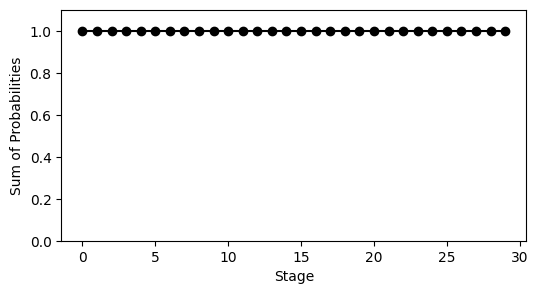

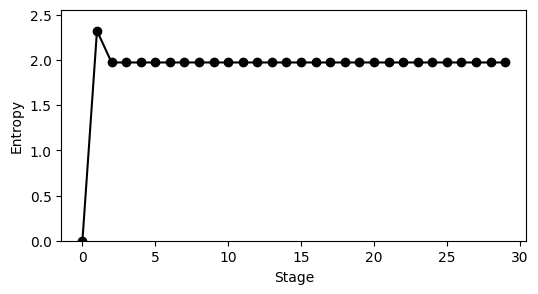

In [59]:

#pairs_pool=[(['A','ALPHA'],['BETA','B']),(['A','BETA_prime'],['ALPHA_prime','B']),(['A','ALPHA'],['ALPHA','A'])]
#pairs_pool=[(['A','ALPHA'],['ALPHA','A'])]
DNA=['A', 'ALPHA', 'BETA_prime', 'B_prime', 'A', 'ALPHA', 'B','BETA','B','BETA']
pairs_pool=[(['A','ALPHA'],['B','BETA'])]
stored_data= probability_calculation(DNA,pairs_pool,numberofevents=30,print_output=1)


In [41]:
print(stored_data)

[Counter({('1', 'A', 'ALPHA', '2', 'BETA', 'B', '3', 'A', 'ALPHA', '4', 'BETA', 'B', '5', 'A', 'ALPHA', '6', 'BETA', 'B', '7', 'A', 'ALPHA', '8', 'BETA', 'B', '9', 'A', 'ALPHA', '10', 'BETA', 'B', '11'): 1}), Counter({('1', 'A', 'ALPHA', '2', 'BETA', 'B', '3', 'A', 'ALPHA', '4', 'BETA', 'B', '5', 'A', 'ALPHA', '6', 'BETA', 'B', '7', 'A', 'ALPHA', '8', 'BETA', 'B', '9', 'A', 'ALPHA', '10', 'BETA', 'B', '11'): 1.0}), Counter({('1', 'A', 'ALPHA', '2', 'BETA', 'B', '3', 'A', 'ALPHA', '4', 'BETA', 'B', '5', 'A', 'ALPHA', '6', 'BETA', 'B', '7', 'A', 'ALPHA', '8', 'BETA', 'B', '9', 'A', 'ALPHA', '10', 'BETA', 'B', '11'): 1.0}), Counter({('1', 'A', 'ALPHA', '2', 'BETA', 'B', '3', 'A', 'ALPHA', '4', 'BETA', 'B', '5', 'A', 'ALPHA', '6', 'BETA', 'B', '7', 'A', 'ALPHA', '8', 'BETA', 'B', '9', 'A', 'ALPHA', '10', 'BETA', 'B', '11'): 1.0}), Counter({('1', 'A', 'ALPHA', '2', 'BETA', 'B', '3', 'A', 'ALPHA', '4', 'BETA', 'B', '5', 'A', 'ALPHA', '6', 'BETA', 'B', '7', 'A', 'ALPHA', '8', 'BETA', 'B', '9'